<a href="https://colab.research.google.com/github/khushbushah28/Computational_photography/blob/master/SaliencyCrop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saliency Cropped Image


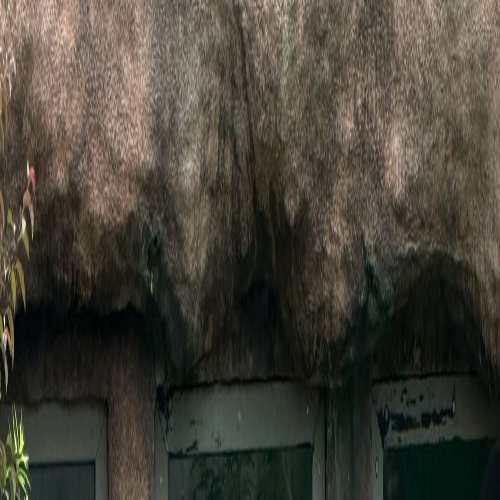

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


#function to process an image by cropping the most salient part and then resizing it
def saliency_crop(image_path, output_size=(500, 500)):

    # Load image
    image = cv2.imread(image_path)

    # Check if image loaded successfully
    if image is None:
        print("The image path is incorrect.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # global contrast of the image
    mean_intensity = np.mean(gray)
    saliency_map = np.abs(gray - mean_intensity)

    # Normalize the saliency map
    saliency_map = (saliency_map / np.max(saliency_map) * 255).astype(np.uint8)

    # threshold for binary map
    _, binary_map = cv2.threshold(saliency_map, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # contours in the binary map
    contours, _ = cv2.findContours(binary_map, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Assuming that the largest contour is the most salient region
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        x, y, w, h = cv2.boundingRect(largest_contour)
        cropped_image = image[y:y+h, x:x+w]
        # Resize the cropped image
        resized_image = cv2.resize(cropped_image, output_size)
        return resized_image
    else:
        return cv2.resize(image, output_size)


image_path = '/content/lion.png'  # Replace with image path
cropped_resized_image = saliency_crop(image_path)

if cropped_resized_image is not None:
    # Display the cropped and resized image
    print("Saliency Cropped Image")
    cv2_imshow(cropped_resized_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()